In [26]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Explainability
import shap

# Visualization
import plotly.express as px

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [34]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv.zip to city_day.csv.zip


In [53]:
import io
import zipfile

# Assuming the uploaded file is a zip archive
zip_file = zipfile.ZipFile(io.BytesIO(uploaded['city_day.csv.zip']), 'r')

# Assuming the CSV file inside the zip is named 'city_day.csv'
with zip_file.open('city_day.csv') as csv_file:
    df = pd.read_csv(csv_file, encoding='utf-8')

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [40]:
df = df.dropna(subset=['PM2.5', 'PM10', 'NO2', 'CO', 'O3'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Target and features
df = df.rename(columns={'AQI': 'aqi'})
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'month', 'year']
target = 'aqi'

df = df.dropna(subset=[target])
print(df.shape)


(16322, 18)


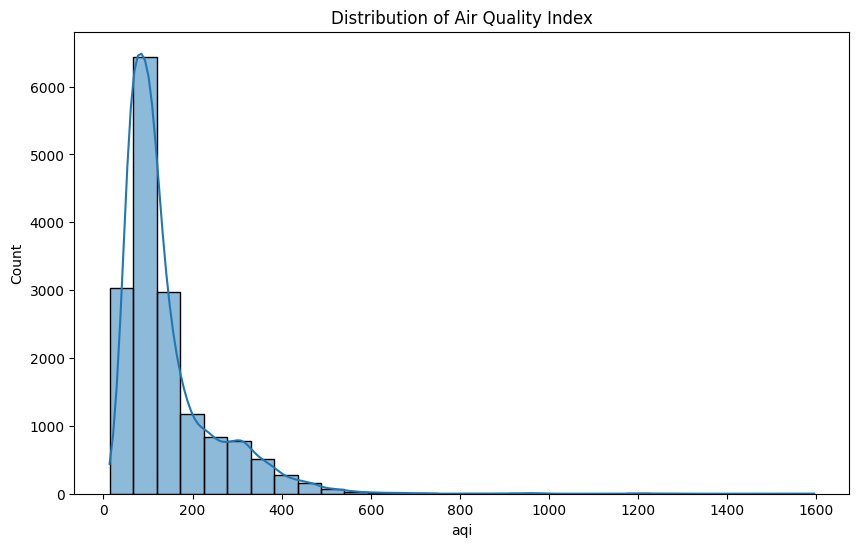

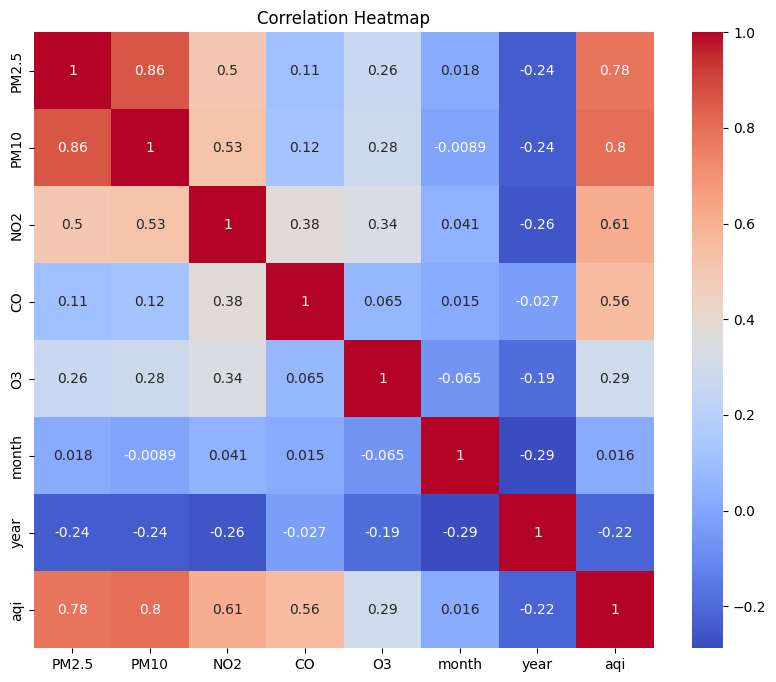

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['aqi'], bins=30, kde=True)
plt.title("Distribution of Air Quality Index")
plt.show()

corr = df[features + [target]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [42]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 27.82
R² Score: 0.93


In [46]:
import shap
import xgboost

print(f"SHAP version: {shap.__version__}")
print(f"XGBoost version: {xgboost.__version__}")

SHAP version: 0.49.1
XGBoost version: 3.1.0


In [50]:
fig = px.scatter(df, x="PM2.5", y="aqi", color="month", title="PM2.5 vs AQI")
fig.show()


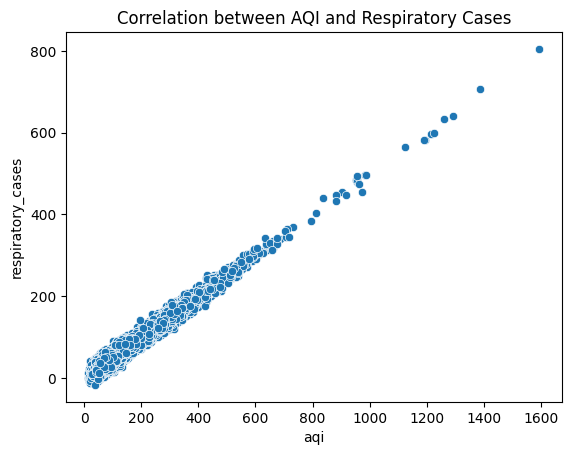

In [51]:
np.random.seed(42)
df['respiratory_cases'] = df['aqi'] * 0.5 + np.random.normal(0, 10, len(df))

sns.scatterplot(x='aqi', y='respiratory_cases', data=df)
plt.title("Correlation between AQI and Respiratory Cases")
plt.show()


In [52]:
df.to_csv("processed_air_quality.csv", index=False)
files.download("processed_air_quality.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>